In [45]:
import re
import pandas as pd

In [46]:
f = open('cricket_group.txt', 'r', encoding = 'utf-8')

In [47]:
data = f.read()

In [48]:
print(data)

10/17/22, 7:22 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
10/17/22, 7:22 PM - Pritam created group "khelne chale"
10/17/22, 7:22 PM - Pritam added you
10/17/22, 7:22 PM - Pritam changed the subject from "khelne chale" to "khelne chale 🏏"
10/17/22, 7:22 PM - Pritam: Hiie
10/17/22, 7:23 PM - Mukhtar: Hi
10/17/22, 7:23 PM - Pritam: Khelna chalu krte hain
10/17/22, 7:23 PM - Pritam: Apn
10/17/22, 7:23 PM - Mukhtar: Haa bro
10/17/22, 7:23 PM - Mukhtar: Karo
10/17/22, 7:23 PM - Pritam: Group pe jo bhi hain subko possible hain
10/17/22, 7:24 PM - Pritam: ??
10/17/22, 7:24 PM - Pritam: Welly date fixed krte hain
10/17/22, 7:24 PM - Pritam: Aur chlte hain
10/17/22, 7:24 PM - Pritam: Weekly
10/17/22, 7:24 PM - Mukhtar: Sunday ko ground nhi milta hai bro
10/17/22, 7:24 PM - Pritam: Friday sat
10/17/22, 7:24 PM - Pritam: Sunday match khelte hain
10/17/22, 7:25 PM - Pritam: Pehele practice krte hai

In [49]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[AaPp][Mm]\s-\s'

In [50]:
messages = re.split(pattern,data)[1:]

In [51]:
messages = [i.strip() for i in messages]

In [52]:
dates = re.findall(pattern, data)

In [53]:
dates = [i.split(' -')[0] for i in dates]

In [54]:
dates = [i.replace(',', '') for i in dates]

In [55]:
dates

['10/17/22 7:22 PM',
 '10/17/22 7:22 PM',
 '10/17/22 7:22 PM',
 '10/17/22 7:22 PM',
 '10/17/22 7:22 PM',
 '10/17/22 7:23 PM',
 '10/17/22 7:23 PM',
 '10/17/22 7:23 PM',
 '10/17/22 7:23 PM',
 '10/17/22 7:23 PM',
 '10/17/22 7:23 PM',
 '10/17/22 7:24 PM',
 '10/17/22 7:24 PM',
 '10/17/22 7:24 PM',
 '10/17/22 7:24 PM',
 '10/17/22 7:24 PM',
 '10/17/22 7:24 PM',
 '10/17/22 7:24 PM',
 '10/17/22 7:25 PM',
 '10/17/22 7:25 PM',
 '10/17/22 7:25 PM',
 '10/17/22 7:25 PM',
 '10/17/22 7:25 PM',
 '10/17/22 7:26 PM',
 '10/17/22 7:26 PM',
 '10/17/22 7:26 PM',
 '10/17/22 7:26 PM',
 '10/17/22 7:27 PM',
 '10/17/22 7:27 PM',
 '10/17/22 7:27 PM',
 '10/17/22 7:27 PM',
 '10/17/22 7:28 PM',
 '10/17/22 7:28 PM',
 '10/17/22 7:28 PM',
 '10/17/22 7:28 PM',
 '10/17/22 7:29 PM',
 '10/17/22 7:29 PM',
 '10/17/22 7:29 PM',
 '10/17/22 7:35 PM',
 '10/17/22 7:37 PM',
 '10/17/22 7:39 PM',
 '10/17/22 7:39 PM',
 '10/17/22 7:39 PM',
 '10/17/22 7:39 PM',
 '10/17/22 7:43 PM',
 '10/17/22 7:45 PM',
 '10/17/22 7:45 PM',
 '10/17/22 7:

### Creating Dataframe of dates and messages

In [56]:
df = pd.DataFrame({'message_date': dates,'user_message': messages})

In [57]:
df['message_date'] = pd.to_datetime(df['message_date'])

In [58]:
df

,message_date,user_message
0,2022-10-17 19:22:00,Messages and calls are end-to-end encrypted. N...
1,2022-10-17 19:22:00,"Pritam created group ""khelne chale"""
2,2022-10-17 19:22:00,Pritam added you
3,2022-10-17 19:22:00,"Pritam changed the subject from ""khelne chale""..."
4,2022-10-17 19:22:00,Pritam: Hiie
...,...,...
1060,2023-01-21 18:25:00,Pratikesh: Mai
1061,2023-01-21 19:24:00,Gururaj: Me
1062,2023-01-21 20:22:00,Vsuraj25: Lilly aayega?
1063,2023-01-21 20:22:00,Vsuraj25: Sunday boyys\n1. Verma\n2. Pritam\n3...


### Seperating Username and message

In [59]:
users = []
sep_messages = []
for msg in df['user_message']:
    entries = re.split('([\w\W]+?):\s', msg)
    if entries[1:]:
        users.append(entries[1])
        sep_messages.append(entries[2])
    else:
        users.append('group_nortification')
        sep_messages.append(entries[0])
df['user'] = users
df['message'] = sep_messages
df.drop(columns=['user_message'], inplace = True)
        

In [60]:
df

,message_date,user,message
0,2022-10-17 19:22:00,group_nortification,Messages and calls are end-to-end encrypted. N...
1,2022-10-17 19:22:00,group_nortification,"Pritam created group ""khelne chale"""
2,2022-10-17 19:22:00,group_nortification,Pritam added you
3,2022-10-17 19:22:00,group_nortification,"Pritam changed the subject from ""khelne chale""..."
4,2022-10-17 19:22:00,Pritam,Hiie
...,...,...,...
1060,2023-01-21 18:25:00,Pratikesh,Mai
1061,2023-01-21 19:24:00,Gururaj,Me
1062,2023-01-21 20:22:00,Vsuraj25,Lilly aayega?
1063,2023-01-21 20:22:00,Vsuraj25,Sunday boyys\n1. Verma\n2. Pritam\n3. Lilly\n4...


### Extracting the Year, Month and Date from the date column

In [61]:
df['year'] = df['message_date'].dt.year
df['month'] = df['message_date'].dt.month_name()
df['day'] = df['message_date'].dt.day
df['hour'] = df['message_date'].dt.hour
df['minute'] = df['message_date'].dt.minute

In [62]:
df.head()

,message_date,user,message,year,month,day,hour,minute
0,2022-10-17 19:22:00,group_nortification,Messages and calls are end-to-end encrypted. N...,2022,October,17,19,22
1,2022-10-17 19:22:00,group_nortification,"Pritam created group ""khelne chale""",2022,October,17,19,22
2,2022-10-17 19:22:00,group_nortification,Pritam added you,2022,October,17,19,22
3,2022-10-17 19:22:00,group_nortification,"Pritam changed the subject from ""khelne chale""...",2022,October,17,19,22
4,2022-10-17 19:22:00,Pritam,Hiie,2022,October,17,19,22


In [63]:
df.user.unique()

array(['group_nortification', 'Pritam', 'Mukhtar', 'Gururaj', 'Pratikesh',
       'Vsuraj25', 'Lalit', 'Anupam', '+91 70453 09355'], dtype=object)

### Streamlit Application

In [64]:
df[df['message'] == '<Media omitted>'].shape

(63, 8)

In [65]:
### Extracting url from messages

In [66]:
from urlextract import URLExtract

url_extractor = URLExtract()

links = []
for msg in df['message']:    
    links.extend(url_extractor.find_urls(msg))

In [67]:
links

['https://dl.flipkart.com/s/2mhiSwNNNN',
 'https://dl.flipkart.com/s/Ld3Rp9uuuN',
 'https://maps.app.goo.gl/f47Vu3qCRouZyQKn8?g_st=iw',
 'https://youtu.be/8M61D4W-174',
 'https://youtu.be/JSw825Fs5FI',
 'https://www.instagram.com/reel/CmRW47SId_E/?igshid=NTU1Mzc3ZGM=']

In [68]:
len(links)

6

In [69]:
### Most Frequent users

In [70]:
import matplotlib.pyplot as plt

In [71]:
top_5_user = df['user'].value_counts().head()

In [72]:
name = top_5_user.index
count = top_5_user.values

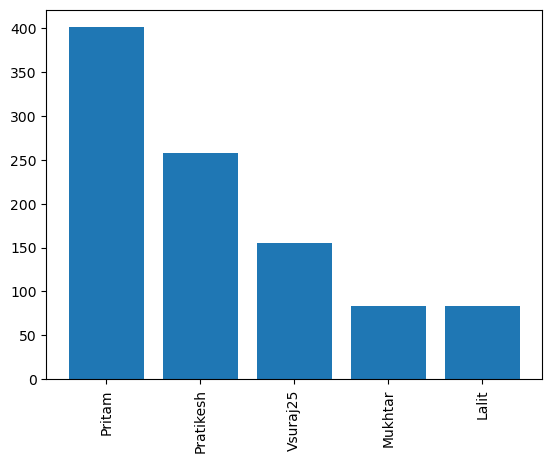

In [73]:
plt.bar(name, count)
plt.xticks(rotation = 'vertical')
plt.show()

In [74]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index': 'User', 'user': 'Usage Percent'})

,User,Usage Percent
0,Pritam,37.65
1,Pratikesh,24.23
2,Vsuraj25,14.55
3,Mukhtar,7.79
4,Lalit,7.79
5,Gururaj,4.51
6,group_nortification,1.88
7,Anupam,1.50
8,+91 70453 09355,0.09


In [75]:
from wordcloud import WordCloud

In [76]:
def create_wordcloud(dataframe):

    wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
    df_wc = wc.generate(dataframe['message'].str.cat(sep = " "))
    return df_wc

In [77]:
create_wordcloud(df)

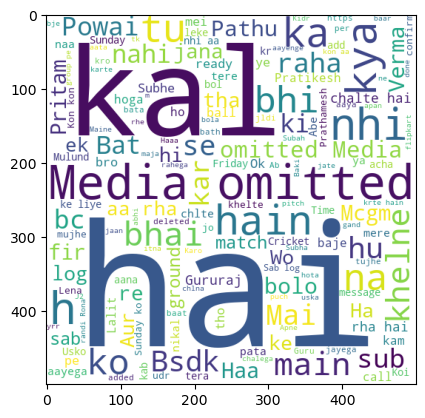

In [78]:
fig, ax = plt.subplots()
ax.imshow(create_wordcloud(df))
plt.show()

## Top 10 most used words

In [79]:
df.head()

,message_date,user,message,year,month,day,hour,minute
0,2022-10-17 19:22:00,group_nortification,Messages and calls are end-to-end encrypted. N...,2022,October,17,19,22
1,2022-10-17 19:22:00,group_nortification,"Pritam created group ""khelne chale""",2022,October,17,19,22
2,2022-10-17 19:22:00,group_nortification,Pritam added you,2022,October,17,19,22
3,2022-10-17 19:22:00,group_nortification,"Pritam changed the subject from ""khelne chale""...",2022,October,17,19,22
4,2022-10-17 19:22:00,Pritam,Hiie,2022,October,17,19,22


In [127]:
temp = df[df['user'] != 'group_nortification']
temp


,message_date,user,message,year,month,day,hour,minute
4,2022-10-17 19:22:00,Pritam,Hiie,2022,October,17,19,22
5,2022-10-17 19:23:00,Mukhtar,Hi,2022,October,17,19,23
6,2022-10-17 19:23:00,Pritam,Khelna chalu krte hain,2022,October,17,19,23
7,2022-10-17 19:23:00,Pritam,Apn,2022,October,17,19,23
8,2022-10-17 19:23:00,Mukhtar,Haa bro,2022,October,17,19,23
...,...,...,...,...,...,...,...,...
1060,2023-01-21 18:25:00,Pratikesh,Mai,2023,January,21,18,25
1061,2023-01-21 19:24:00,Gururaj,Me,2023,January,21,19,24
1062,2023-01-21 20:22:00,Vsuraj25,Lilly aayega?,2023,January,21,20,22
1063,2023-01-21 20:22:00,Vsuraj25,Sunday boyys\n1. Verma\n2. Pritam\n3. Lilly\n4...,2023,January,21,20,22


In [128]:
temp = temp[temp['message'] != '<Media omitted>']
temp.head()

,message_date,user,message,year,month,day,hour,minute
4,2022-10-17 19:22:00,Pritam,Hiie,2022,October,17,19,22
5,2022-10-17 19:23:00,Mukhtar,Hi,2022,October,17,19,23
6,2022-10-17 19:23:00,Pritam,Khelna chalu krte hain,2022,October,17,19,23
7,2022-10-17 19:23:00,Pritam,Apn,2022,October,17,19,23
8,2022-10-17 19:23:00,Mukhtar,Haa bro,2022,October,17,19,23


In [129]:
temp.head(50)

,message_date,user,message,year,month,day,hour,minute
4,2022-10-17 19:22:00,Pritam,Hiie,2022,October,17,19,22
5,2022-10-17 19:23:00,Mukhtar,Hi,2022,October,17,19,23
6,2022-10-17 19:23:00,Pritam,Khelna chalu krte hain,2022,October,17,19,23
7,2022-10-17 19:23:00,Pritam,Apn,2022,October,17,19,23
8,2022-10-17 19:23:00,Mukhtar,Haa bro,2022,October,17,19,23
9,2022-10-17 19:23:00,Mukhtar,Karo,2022,October,17,19,23
10,2022-10-17 19:23:00,Pritam,Group pe jo bhi hain subko possible hain,2022,October,17,19,23
11,2022-10-17 19:24:00,Pritam,??,2022,October,17,19,24
12,2022-10-17 19:24:00,Pritam,Welly date fixed krte hain,2022,October,17,19,24
13,2022-10-17 19:24:00,Pritam,Aur chlte hain,2022,October,17,19,24


In [130]:
file = open(file = 'stopwords-hinglish.txt', mode = 'r', encoding = 'utf-8')
stopwords = file.read()
print(stopwords)

.
..
...
?
??
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
c

In [131]:
words = []

for msg in temp['message']:
    for word in msg.lower().split():
        if word not in stopwords:
            words.append(word)

In [132]:
words

['hiie',
 'khelna',
 'chalu',
 'krte',
 'group',
 'subko',
 'possible',
 'welly',
 'date',
 'fixed',
 'krte',
 'chlte',
 'weekly',
 'sunday',
 'ground',
 'milta',
 'friday',
 'sunday',
 'match',
 'khelte',
 'pehele',
 'practice',
 'krte',
 'puch',
 'isiliye',
 'group',
 'text',
 'kro',
 'possible',
 'kb',
 'kb',
 'kiskis',
 'date',
 'krte',
 'khelne',
 '@919372226265',
 'vikas',
 'murarji',
 'rheta',
 'frnd',
 'khlte',
 'pehele',
 'cricket',
 'aacha',
 'khelta',
 'khelke',
 'team',
 'banani',
 'practice',
 'krke',
 'interested',
 'rahega',
 'ismain',
 'krdo',
 'no.',
 'share',
 'krdo',
 'group',
 '@918268463949',
 'possilbe',
 'aashish',
 'naam',
 '😂😂😂😂',
 'virat',
 'kohli',
 'bhia',
 'khelne',
 'catch',
 'bitch',
 'pakdega',
 'kaam',
 'avesh',
 'khan',
 'bowling',
 'sikhyega',
 'rohit',
 'fan',
 'lund',
 'naam',
 'pathu',
 'jese',
 'ekdum',
 'friday',
 '???',
 'player',
 'market',
 'shii',
 'sasta',
 'williamson',
 '😂',
 'badi',
 'achi',
 'bath',
 'sasta',
 'hasan',
 'forgot',
 '2017'

In [135]:
from collections import Counter
word_freq = pd.DataFrame(Counter(words).most_common(20), columns=['Word', 'Frequency'])

In [136]:
word_freq

,Word,Frequency
0,khelne,29
1,bsdk,23
2,powai,19
3,pathu,18
4,verma,18
5,😂😂,17
6,mcgm,17
7,😂,16
8,jana,16
9,sunday,15


In [143]:
word_freq['Word']

0     khelne
1       bsdk
2      powai
3      pathu
4      verma
5         😂😂
6       mcgm
7          😂
8       jana
9     sunday
10      baje
11    ground
12     match
13    chalte
14     subhe
15      ball
16     lalit
17    pritam
18     chlte
19     nikal
Name: Word, dtype: object

## Emoji Analysis

In [148]:
import emoji

In [163]:
emojis = []
for message in df['message']:
    emojis.extend([e for e in message if e in list(emoji.get_emoji_unicode_dict('en').values())])

In [164]:
emojis

['🏏',
 '🏏',
 '🏏',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🥱',
 '😂',
 '😂',
 '😂',
 '🏏',
 '🏏',
 '😕',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😎',
 '😂',
 '😂',
 '😂',
 '😂',
 '🙂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '\U0001fae1',
 '✋',
 '👍',
 '😂',
 '😅',
 '😅',
 '😂',
 '😂',
 '😌',
 '😂',
 '😂',
 '💩',
 '💩',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😁',
 '😁',
 '😁',
 '😂',
 '😘',
 '😂',
 '😂',
 '✨',
 '😁',
 '🔥',
 '🔥',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😅',
 '😂',
 '😂',
 '🎂',
 '🎂',
 '🎂',
 '🎉',
 '✨',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '👍',
 '🏻',
 '😒',
 '😂',
 '🍦',
 '😂',
 '😂',
 '\U0001f972',
 '🙂',
 '😂',
 '😂',
 '🥔']

In [166]:
pd.DataFrame(Counter(emojis).most_common(len(emojis)), columns = ['Emoji', 'Frequency'])

,Emoji,Frequency
0,😂,75
1,🏏,5
2,😁,4
3,😅,3
4,🎂,3
5,🙂,2
6,👍,2
7,💩,2
8,✨,2
9,🔥,2


## Message Timeline

In [168]:
timeline = df.groupby(['year', 'month']).count()['message'].reset_index()

In [169]:
timeline

,year,month,message
0,2022,November,377
1,2022,October,521
2,2023,January,167


In [171]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + '-' + str(timeline['year'][i]))


In [173]:
timeline['time'] = time

In [174]:
timeline

,year,month,message,time
0,2022,November,377,November-2022
1,2022,October,521,October-2022
2,2023,January,167,January-2023


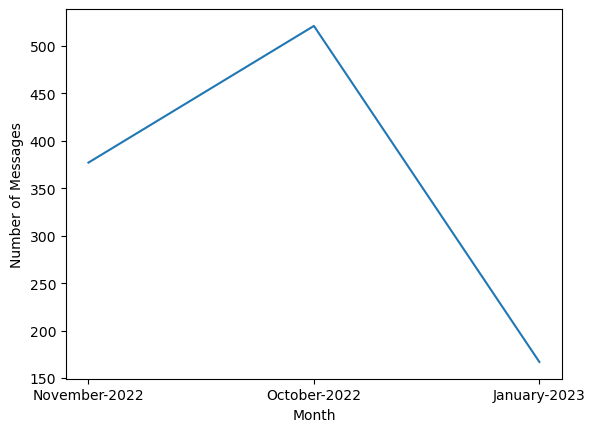

In [178]:
plt.ylabel('Number of Messages')
plt.xlabel('Month')
plt.plot(timeline['time'], timeline['message'])

## Daily Timeline

In [183]:
df['only_date'] = df.message_date.dt.date

In [184]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

In [185]:
daily_timeline

,only_date,message
0,2022-10-17,53
1,2022-10-18,22
2,2022-10-19,30
3,2022-10-20,9
4,2022-10-21,84
5,2022-10-22,7
6,2022-10-24,48
7,2022-10-25,59
8,2022-10-26,36
9,2022-10-27,4


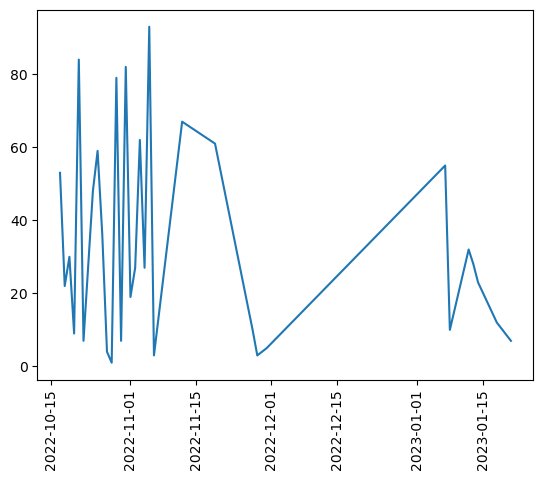

In [188]:
plt.xticks(rotation = 'vertical')
plt.plot(daily_timeline['only_date'], daily_timeline['message'])

In [193]:
df['day_name'] = df['message_date'].dt.day_name()

In [194]:
df.head()

,message_date,user,message,year,month,day,hour,minute,only_date,day_name
0,2022-10-17 19:22:00,group_nortification,Messages and calls are end-to-end encrypted. N...,2022,October,17,19,22,2022-10-17,Monday
1,2022-10-17 19:22:00,group_nortification,"Pritam created group ""khelne chale""",2022,October,17,19,22,2022-10-17,Monday
2,2022-10-17 19:22:00,group_nortification,Pritam added you,2022,October,17,19,22,2022-10-17,Monday
3,2022-10-17 19:22:00,group_nortification,"Pritam changed the subject from ""khelne chale""...",2022,October,17,19,22,2022-10-17,Monday
4,2022-10-17 19:22:00,Pritam,Hiie,2022,October,17,19,22,2022-10-17,Monday


<BarContainer object of 7 artists>

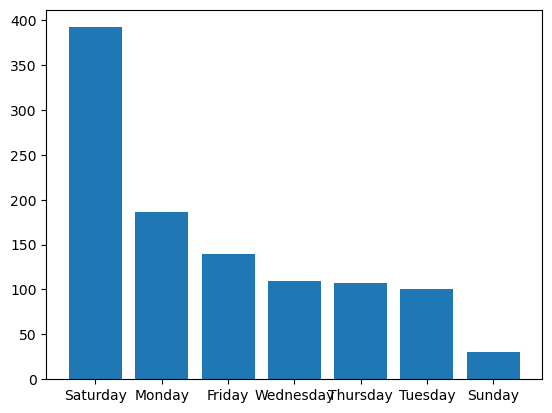

In [201]:
plt.bar(df['day_name'].value_counts().index, (df['day_name'].value_counts().values))

## Heatmap of message timeline

In [202]:
period = []
for hour in df['hour']:
    if hour == 23:
        period.append(str(hour) + '-' + '00')
    elif hour == 00:
        period.append('00' + '-' + str(hour+1))
    else:
        period.append(str(hour) + '-' + str(hour+1))

In [203]:
period

['19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '12-13',
 '13-14',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '16-17',
 '16-17',
 '16-17',
 '16-17',
 '16-17',
 '16-17',
 '16-17',
 '16-17',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '22-23',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '22-23',


In [204]:
df['period'] = period

In [206]:
period_df = df.pivot_table(index='day_name', columns='period', values = 'message', aggfunc='count').fillna(0)

In [208]:
period_df

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,2-3,20-21,21-22,22-23,23-00,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,9.0,...,0.0,6.0,69.0,19.0,0.0,0.0,0.0,0.0,0.0,1.0
Monday,0.0,0.0,0.0,3.0,8.0,1.0,6.0,7.0,6.0,42.0,...,0.0,3.0,0.0,9.0,23.0,0.0,0.0,0.0,0.0,0.0
Saturday,4.0,0.0,0.0,14.0,33.0,0.0,66.0,69.0,8.0,22.0,...,1.0,45.0,27.0,44.0,42.0,0.0,4.0,0.0,0.0,0.0
Sunday,7.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,3.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
Thursday,0.0,0.0,0.0,0.0,0.0,28.0,0.0,18.0,7.0,0.0,...,0.0,5.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
Tuesday,32.0,0.0,1.0,0.0,1.0,1.0,3.0,10.0,24.0,1.0,...,0.0,3.0,3.0,9.0,0.0,0.0,4.0,2.0,1.0,0.0
Wednesday,0.0,0.0,0.0,22.0,0.0,16.0,0.0,0.0,0.0,0.0,...,0.0,4.0,16.0,10.0,2.0,1.0,2.0,0.0,0.0,0.0
